In [1]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
pip install JPype1-1.4.0-cp310-cp310-win_amd64

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement JPype1-1.4.0-cp310-cp310-win_amd64 (from versions: none)
ERROR: No matching distribution found for JPype1-1.4.0-cp310-cp310-win_amd64


In [3]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [4]:
! python -m pip install --upgrade pip

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [13]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame  as df

Data=pd.read_excel('C:/Users/danie/Downloads/topic.xls')

In [3]:
Data

,number,text
0,1,음성인식 키오스크 장치(KIOSK APPARATUS CAPABLE OF RECOGN...
1,2,음성인식 키오스크(Voice recognition kiosk)
2,3,음성인식 간편 민원서식 도우미 서비스 시스템(A civil format help s...
3,4,인공지능을 사용하는 키오스크 기반 무인결제시스템 그 방법(KIOSK-BASED U...
4,5,키오스크를 기반으로 하는 공유 오피스(SHARED OFFICE BASED KIOSK)
...,...,...
527,528,정확한 위치 정보의 디바이스-간 전달(INTER-DEVICE TRANSFER OF ...
528,529,휴대폰 단문메시지서비스를 연동한 자전거안전주차시스템(Bike Safety Parki...
529,530,한글 입력 장치 그 방법(The Korean alphabet input appar...
530,531,단말기용 3차원 입체영상 디스플레이 장치(Three-dimensional displ...


In [4]:
Data.text = Data.text.astype(str)

clean_Data = Data.loc[Data['text'].str.contains('keyword1|keyword2')]

clean_Data = Data[~Data['text'].str.contains('keyword1|keyword2')]

clean_Data.drop_duplicates(subset=['text','number'], inplace=True)

#한글이 아니면 빈 문자열로 변환
clean_Data['text'] = clean_Data['text'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ',regex=True)

#빈 문자열 NAN 값으로 바꾸고 NAN행 삭제
clean_Data = clean_Data.replace({'': np.nan})
clean_Data = clean_Data.replace(r'^\s*$', None, regex=True)
clean_Data.dropna(how='any', inplace=True)

clean_Data = clean_Data.reset_index (drop = True)

print(clean_Data.isnull().values.any())

False


In [5]:
clean_Data

,number,text
0,1,음성인식 키오스크 장치 ...
1,2,음성인식 키오스크
2,3,음성인식 간편 민원서식 도우미 서비스 시스템 ...
3,4,인공지능을 사용하는 키오스크 기반 무인결제시스템 그 방법 ...
4,5,키오스크를 기반으로 하는 공유 오피스
...,...,...
527,528,정확한 위치 정보의 디바이스 간 전달 ...
528,529,휴대폰 단문메시지서비스를 연동한 자전거안전주차시스템 ...
529,530,한글 입력 장치 그 방법 ...
530,531,단말기용 차원 입체영상 디스플레이 장치 ...


In [6]:
from konlpy.tag import Okt

In [7]:
#텍스트 데이터를 리스트로 변환
okt = Okt()
Data_list=clean_Data.text.values.tolist()

#명사만 추출 후 리스트로 저장
data_word=[]
for i in range(len(Data_list)):
    try:
        data_word.append(okt.nouns(Data_list[i]))
    except Exception as e:
        continue

data_word
    

[['음성인식', '키오스크', '장치'],
 ['음성인식', '키오스크'],
 ['음성인식', '간편', '민원', '서식', '도우미', '서비스', '시스템'],
 ['인공', '지능', '사용', '키오스크', '기반', '무인', '결제', '시스템', '그', '방법'],
 ['키오스크', '기반', '공유', '오피스'],
 ['음성처리', '기능', '키오스크'],
 ['시각', '청각장애', '인용', '키오스크'],
 ['시니어', '세대', '위', '키오스크', '지원', '로봇', '시스템', '이의', '제어', '방법'],
 ['시각', '장애인', '접근성', '향상', '위', '키오스크', '리모컨'],
 ['누구', '제약', '사용', '수', '스마트', '키오스크'],
 ['인식', '거리', '향상', '비', '터치', '키오스크'],
 ['행동', '분석', '통한', '사용자', '맞춤', '인터페이스', '공용', '키오스크', '그', '방법'],
 ['다기', '능', '키오스크', '시스템'],
 ['안면', '인식', '이용', '사용자', '맞춤', '키오스크', '이용', '제어', '방법'],
 ['키오스크',
  '단말기',
  '태블릿',
  '를',
  '이용',
  '주차',
  '차단기',
  '자동',
  '출입',
  '휴대폰',
  '이용',
  '주차',
  '차단기',
  '개폐',
  '시스템'],
 ['안면', '인식', '기술', '활용', '사용자', '반응', '키오스크'],
 ['패널', '조립', '키오스크', '장치'],
 ['발열', '감지', '소독', '시스템', '구비', '키오스크'],
 ['원거리', '감각', '전달', '키오스크', '이용', '원격', '건강', '진단', '장치'],
 ['로봇', '키오스크'],
 ['다수', '키오스크', '데이터', '통합', '제어', '방법', '시스템'],
 ['높낮이', '조절', '안전', '키오스크'],

In [8]:
import gensim
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [9]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [11]:
dictionary = corpora.Dictionary(data_word)

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-01-23 17:39:56,844 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-01-23 17:39:56,858 : INFO : built Dictionary<974 unique tokens: ['음성인식', '장치', '키오스크', '간편', '도우미']...> from 532 documents (total 4120 corpus positions)
2024-01-23 17:39:56,859 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<974 unique tokens: ['음성인식', '장치', '키오스크', '간편', '도우미']...> from 532 documents (total 4120 corpus positions)", 'datetime': '2024-01-23T17:39:56.859082', 'gensim': '4.3.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}

In [12]:
dictionary.filter_extremes(no_below=2, no_above=0.5)

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-01-23 17:39:57,379 : INFO : discarding 549 tokens: [('간편', 1), ('도우미', 1), ('방법', 365), ('청각장애', 1), ('세대', 1), ('시니어', 1), ('리모컨', 1), ('접근성', 1), ('누구', 1), ('제약', 1)]...
2024-01-23 17:39:57,381 : INFO : keeping 425 tokens which were in no less than 2 and no more than 266 (=50.0%) documents
2024-01-23 17:39:57,382 : INFO : resulting dictionary: Dictionary<425 unique tokens: ['음성인식', '장치', '키오스크', '민원', '서비스']...>


In [13]:
corpus = [dictionary.doc2bow(text) for text in data_word]

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
#Perplexity 계산, Perplexity 값이 낮을수록 모델이 정확하게 예측
perplexity_values = []
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-01-23 17:39:58,498 : INFO : using symmetric alpha at 0.5
2024-01-23 17:39:58,500 : INFO : using symmetric eta at 0.5
2024-01-23 17:39:58,502 : INFO : using serial LDA version on this node
2024-01-23 17:39:58,503 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 532 documents, updating model once every 532 documents, evaluating perplexity every 532 documents, iterating 50x with a convergence threshold of 0.001000
2024-01-23 17:39:58,504 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-01-23 17:3

2024-01-23 17:40:01,767 : INFO : -5.738 per-word bound, 53.4 perplexity estimate based on a held-out corpus of 532 documents with 3177 words
2024-01-23 17:40:01,768 : INFO : using symmetric alpha at 0.16666666666666666
2024-01-23 17:40:01,769 : INFO : using symmetric eta at 0.16666666666666666
2024-01-23 17:40:01,769 : INFO : using serial LDA version on this node
2024-01-23 17:40:01,770 : INFO : running online (single-pass) LDA training, 6 topics, 1 passes over the supplied corpus of 532 documents, updating model once every 532 documents, evaluating perplexity every 532 documents, iterating 50x with a convergence threshold of 0.001000
2024-01-23 17:40:01,771 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-01-23 17:40:02,022 : INFO : -7.638 per-word bound, 199.2 perplexity estimate based on a held-out corpus of 532 documents with 3177 words
2024-01-23 17:40:02,023 : INFO : PROGRESS: pass 0, at docu

2024-01-23 17:40:04,057 : INFO : topic #6 (0.111): 0.092*"시스템" + 0.053*"장치" + 0.031*"그" + 0.026*"제공" + 0.026*"관리" + 0.018*"이용" + 0.017*"자동" + 0.013*"비" + 0.013*"무인" + 0.013*"측정"
2024-01-23 17:40:04,058 : INFO : topic #3 (0.111): 0.097*"장치" + 0.067*"시스템" + 0.049*"기반" + 0.029*"지능" + 0.026*"인공" + 0.025*"그" + 0.023*"서비스" + 0.021*"제공" + 0.019*"이용" + 0.019*"정보"
2024-01-23 17:40:04,059 : INFO : topic #4 (0.111): 0.039*"제공" + 0.031*"장치" + 0.024*"키오스크" + 0.024*"액세스" + 0.016*"이용" + 0.016*"기반" + 0.016*"영상" + 0.016*"무인" + 0.016*"동작" + 0.016*"위치"
2024-01-23 17:40:04,059 : INFO : topic diff=6.040422, rho=1.000000
2024-01-23 17:40:04,060 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel<num_terms=425, num_topics=9, decay=0.5, chunksize=2000> in 0.44s', 'datetime': '2024-01-23T17:40:04.060760', 'gensim': '4.3.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2024-01-23 17:40:04,205 : INFO : -5.949 

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


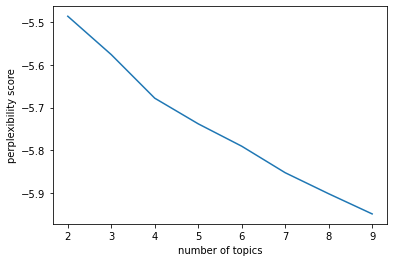

In [17]:
x = range(2,10)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexibility score")
plt.show()

In [18]:
#Coherence 계산, Coherence 값이 높을수록 일관성 높음
coherence_values=[]
for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=dictionary)
    coherence_model_lda=CoherenceModel(model=ldamodel, texts = data_word, dictionary=dictionary,topn=10)
    coherence_lda=coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-01-23 17:41:00,476 : INFO : using symmetric alpha at 0.5
2024-01-23 17:41:00,477 : INFO : using symmetric eta at 0.5
2024-01-23 17:41:00,478 : INFO : using serial LDA version on this node
2024-01-23 17:41:00,479 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 532 documents, updating model once every 532 documents, evaluating perplexity every 532 documents, iterating 50x with a convergence threshold of 0.001000
2024-01-23 17:41:00,480 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-01-23 17:4

2024-01-23 17:41:09,925 : INFO : topic #4 (0.200): 0.062*"시스템" + 0.051*"장치" + 0.037*"이용" + 0.030*"기반" + 0.024*"서비스" + 0.023*"제공" + 0.022*"인공" + 0.022*"지능" + 0.021*"제어" + 0.021*"무인"
2024-01-23 17:41:09,926 : INFO : topic diff=2.942516, rho=1.000000
2024-01-23 17:41:09,927 : INFO : LdaModel lifecycle event {'msg': 'trained LdaModel<num_terms=425, num_topics=5, decay=0.5, chunksize=2000> in 0.57s', 'datetime': '2024-01-23T17:41:09.927551', 'gensim': '4.3.2', 'python': '3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'created'}
2024-01-23 17:41:09,929 : INFO : using ParallelWordOccurrenceAccumulator<processes=7, batch_size=64> to estimate probabilities from sliding windows
2024-01-23 17:41:12,659 : INFO : 7 accumulators retrieved from output queue
2024-01-23 17:41:12,678 : INFO : accumulated word occurrence stats for 532 virtual documents
2024-01-23 17:41:12,752 : INFO : using symmetric alpha at 0.16666666666666666
2024

2024-01-23 17:41:20,778 : INFO : 7 accumulators retrieved from output queue
2024-01-23 17:41:20,789 : INFO : accumulated word occurrence stats for 532 virtual documents
2024-01-23 17:41:20,862 : INFO : using symmetric alpha at 0.1111111111111111
2024-01-23 17:41:20,862 : INFO : using symmetric eta at 0.1111111111111111
2024-01-23 17:41:20,862 : INFO : using serial LDA version on this node
2024-01-23 17:41:20,862 : INFO : running online (single-pass) LDA training, 9 topics, 1 passes over the supplied corpus of 532 documents, updating model once every 532 documents, evaluating perplexity every 532 documents, iterating 50x with a convergence threshold of 0.001000
2024-01-23 17:41:20,862 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2024-01-23 17:41:21,055 : INFO : -8.360 per-word bound, 328.7 perplexity estimate based on a held-out corpus of 532 documents with 3177 words
2024-01-23 17:41:21,055 : INFO :

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


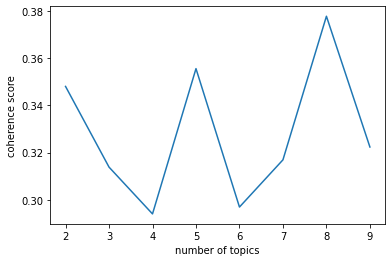

In [19]:
x = range(2,10)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [20]:
NUM_TOPICS = 8 # 토픽 개수는 하이퍼파라미터
PASSES = 15 

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
def lda_modeling(data_word):

    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics = NUM_TOPICS, 
                                            id2word = dictionary, 
                                            passes = PASSES)
    return model, corpus, dictionary

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('./result/topic_prop_' + RATING +  '.xlsx')
    display(topic_prop)

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    # 시각화 결과 저장
    RESULT_FILE = './result/lda_result' + RATING + '.html'
    pyLDAvis.save_html(result_visualized, RESULT_FILE)

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
model, corpus, dictionary = lda_modeling(data_word)
NUM_WORDS = 10

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-01-23 17:42:20,759 : INFO : using symmetric alpha at 0.125
2024-01-23 17:42:20,760 : INFO : using symmetric eta at 0.125
2024-01-23 17:42:20,761 : INFO : using serial LDA version on this node
2024-01-23 17:42:20,763 : INFO : running online (multi-pass) LDA training, 8 topics, 15 passes over the supplied corpus of 532 documents, updating model once every 532 documents, evaluating perplexity every 532 documents, iterating 50x with a convergence threshold of 0.001000
2024-01-23 17:42:20,966 : INFO : -8.130 per-word bound, 280.1 perplexity estimate based on a held-out corpus of 532 documents with 3177 words
2024-01-23 17:42:20,966 : 

2024-01-23 17:42:22,588 : INFO : topic #5 (0.125): 0.085*"장치" + 0.085*"시스템" + 0.070*"기반" + 0.053*"제공" + 0.041*"지능" + 0.040*"인공" + 0.031*"서비스" + 0.026*"정보" + 0.017*"콘텐츠" + 0.016*"위"
2024-01-23 17:42:22,588 : INFO : topic #1 (0.125): 0.063*"시스템" + 0.038*"디바이스" + 0.035*"이용" + 0.024*"장치" + 0.021*"음성" + 0.021*"방지" + 0.020*"동작" + 0.020*"게임" + 0.017*"위" + 0.015*"용"
2024-01-23 17:42:22,588 : INFO : topic #4 (0.125): 0.088*"시스템" + 0.079*"이용" + 0.058*"장치" + 0.045*"처리" + 0.027*"제공" + 0.026*"그" + 0.023*"주차" + 0.020*"데이터" + 0.016*"영상" + 0.016*"단말기"
2024-01-23 17:42:22,597 : INFO : topic #0 (0.125): 0.073*"장치" + 0.049*"시스템" + 0.036*"주문" + 0.033*"위" + 0.032*"서비스" + 0.030*"기반" + 0.025*"관리" + 0.024*"전자" + 0.017*"그" + 0.017*"예측"
2024-01-23 17:42:22,598 : INFO : topic diff=0.080256, rho=0.353553
2024-01-23 17:42:22,720 : INFO : -5.698 per-word bound, 51.9 perplexity estimate based on a held-out corpus of 532 documents with 3177 words
2024-01-23 17:42:22,720 : INFO : PROGRESS: pass 7, at document #532/532

2024-01-23 17:42:24,123 : INFO : topic #5 (0.125): 0.085*"장치" + 0.085*"시스템" + 0.074*"기반" + 0.058*"제공" + 0.044*"지능" + 0.042*"인공" + 0.035*"서비스" + 0.027*"정보" + 0.017*"콘텐츠" + 0.016*"위"
2024-01-23 17:42:24,123 : INFO : topic #1 (0.125): 0.058*"시스템" + 0.052*"디바이스" + 0.039*"이용" + 0.024*"장치" + 0.021*"동작" + 0.020*"방지" + 0.020*"게임" + 0.018*"위" + 0.015*"용" + 0.015*"재활"
2024-01-23 17:42:24,123 : INFO : topic #2 (0.125): 0.074*"장치" + 0.071*"관리" + 0.070*"시스템" + 0.067*"음성" + 0.050*"인식" + 0.044*"위" + 0.021*"모델" + 0.020*"적응" + 0.018*"스마트" + 0.017*"생"
2024-01-23 17:42:24,123 : INFO : topic #4 (0.125): 0.092*"시스템" + 0.085*"이용" + 0.056*"장치" + 0.047*"처리" + 0.026*"그" + 0.024*"주차" + 0.023*"제공" + 0.022*"데이터" + 0.019*"안내" + 0.017*"단말기"
2024-01-23 17:42:24,123 : INFO : topic diff=0.024345, rho=0.258199
2024-01-23 17:42:24,268 : INFO : -5.663 per-word bound, 50.7 perplexity estimate based on a held-out corpus of 532 documents with 3177 words
2024-01-23 17:42:24,268 : INFO : PROGRESS: pass 14, at document #532/53

In [31]:
RATING = 'pos'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-01-23 17:42:24,372 : INFO : topic #0 (0.125): 0.069*"장치" + 0.047*"시스템" + 0.041*"주문" + 0.036*"위" + 0.027*"전자" + 0.027*"서비스" + 0.026*"기반" + 0.022*"관리" + 0.019*"사용" + 0.019*"예측"
2024-01-23 17:42:24,372 : INFO : topic #1 (0.125): 0.058*"시스템" + 0.053*"디바이스" + 0.039*"이용" + 0.024*"장치" + 0.021*"동작" + 0.020*"방지" + 0.020*"게임" + 0.017*"위" + 0.015*"용" + 0.015*"재활"
2024-01-23 17:42:24,378 : INFO : topic #2 (0.125): 0.074*"장치" + 0.073*"관리" + 0.070*"시스템" + 0.067*"음성" + 0.050*"인식" + 0.044*"위" + 0.021*"모델" + 0.020*"적응" + 0.018*"스마트" + 0.017*"생"
2024-01-23 17:42:24,378 : INFO : topic #3 (0.125): 0.058*"시스템" + 0.044*"터치" + 0.037*"무인" + 0.036*"비" + 

,topic_num,word_prop
0,1,"0.069*""장치"" + 0.047*""시스템"" + 0.041*""주문"" + 0.036*..."
1,2,"0.058*""시스템"" + 0.053*""디바이스"" + 0.039*""이용"" + 0.02..."
2,3,"0.074*""장치"" + 0.073*""관리"" + 0.070*""시스템"" + 0.067*..."
3,4,"0.058*""시스템"" + 0.044*""터치"" + 0.037*""무인"" + 0.036*..."
4,5,"0.092*""시스템"" + 0.086*""이용"" + 0.056*""장치"" + 0.047*..."
5,6,"0.085*""시스템"" + 0.085*""장치"" + 0.074*""기반"" + 0.058*..."
6,7,"0.105*""장치"" + 0.072*""시스템"" + 0.028*""이용"" + 0.022*..."
7,8,"0.098*""제어"" + 0.083*""시스템"" + 0.077*""키오스크"" + 0.05..."


In [32]:
lda_visualization = gensimvis.prepare(model, corpus, dictionary, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'file_name.html')

C:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
